In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 1.a - Rotina para gerar pacote de ondas gaussianas

In [36]:
def pacote_onda(x,y,k_0,x_0,y_0,sig):
    term_1 = k_0*(x+y)*1j
    term_2 = ((x-x_0)**2 + (y-y_0)**2)
    return abs(np.exp((term_1-term_2)/(2*sig**2)))

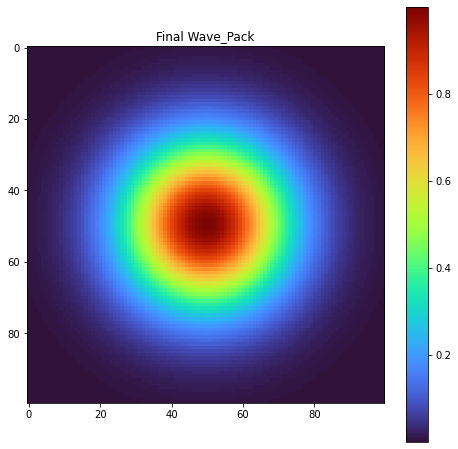

In [61]:
x = np.linspace(0,5,100)
y = np.linspace(0,5,100)
X,Y = np.meshgrid(x,y)
final = pacote_onda(X,Y,2,2.5,2.5,0.8)

plt.figure(figsize=(8,8))
plt.title('Final Wave_Pack')
ot = plt.imshow(final,cmap='turbo')
plt.colorbar()
plt.show()

/var/folders/8k/t_r4nndd2ll03bmm2zsmmrpc0000gn/T/ipykernel_77855/313301632.py:5: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  plt.colorbar(ot)


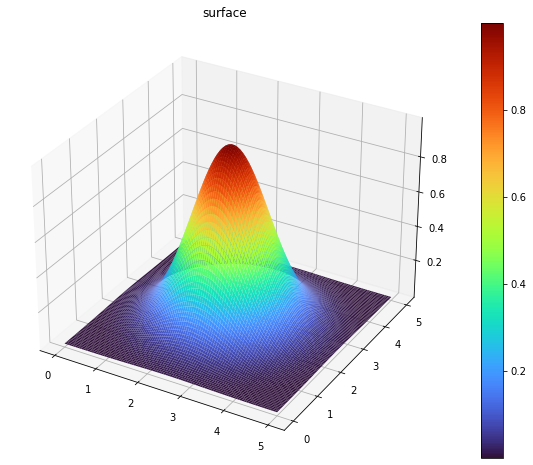

In [65]:
fig = plt.figure(figsize=(14,8))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, final, rstride=1, cstride=1,
                cmap='turbo', edgecolor='none')
plt.colorbar(ot)
ax.set_title('surface');

# 1.b - Rotina para obter o potencial de n fendas com altura váriavel

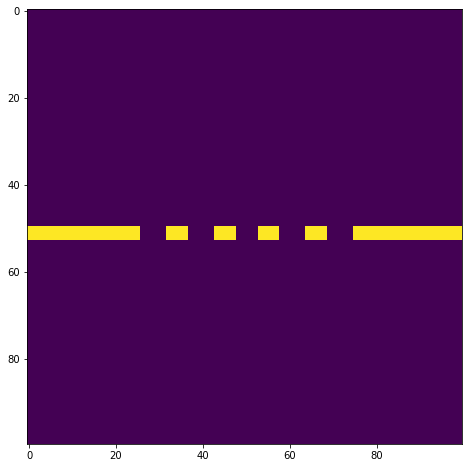

In [139]:
def barriers(N,n,a=1):
    '''
    N: Número de pontos do lado do grid (grid quadrado)
    n: Número de barreiras
    a: Altura barreiras
    '''

    #N = 41 # number of points xx
    grid = np.zeros((N,N))
    center_g = N//2
    #n = 8 # number of barriers 
    n_ = n//2 # number of barriers for each side
    for i in range(n_):
        if i==0:
            grid[center_g:center_g+(a+1),center_g-7*(i+1):center_g-2*(i+1)] = 1
            grid[center_g:center_g+(a+1),center_g+3*(i+1):center_g+8*(i+1)] = 1
        else:
            if center_g-7-11*i >=11: # So that we stay inside the grid
                grid[center_g:center_g+(a+1),center_g-7-11*i:center_g-2-11*i] = 1
                grid[center_g:center_g+(a+1),center_g+3+11*i:center_g+8+11*i] = 1
                left_bar = center_g-7-11*i
                right_bar = center_g+8+11*i
            else:
                print('The number of barriers exceeds the grid size')
                break

                
    grid[center_g:center_g+(a+1),0:left_bar-6] = 1
    grid[center_g:center_g+(a+1),right_bar+6:] = 1
                
    return grid 
        
    
grid = barriers(100,4,2)
plt.figure(figsize=(14,8))
plt.imshow(grid)
plt.show()



# 1.c - 